In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [57]:
df=pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [58]:
df_db=df.copy()

In [59]:
df_db.shape

(100000, 9)

In [60]:
df_db.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [61]:
df_db.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [62]:
df_db.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [63]:
df_db.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [64]:
df_db.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

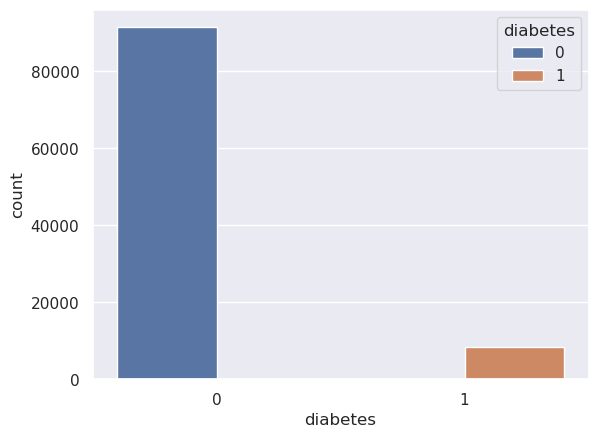

In [65]:
sns.countplot(x='diabetes',hue='diabetes',data=df_db);

<Axes: xlabel='gender', ylabel='count'>

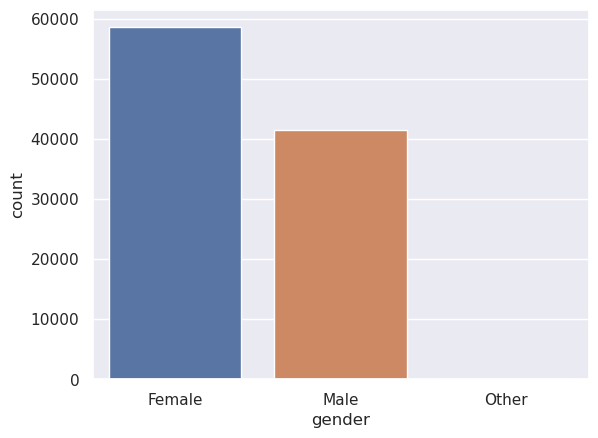

In [66]:
sns.countplot(x='gender', data=df_db)

<Axes: xlabel='gender', ylabel='count'>

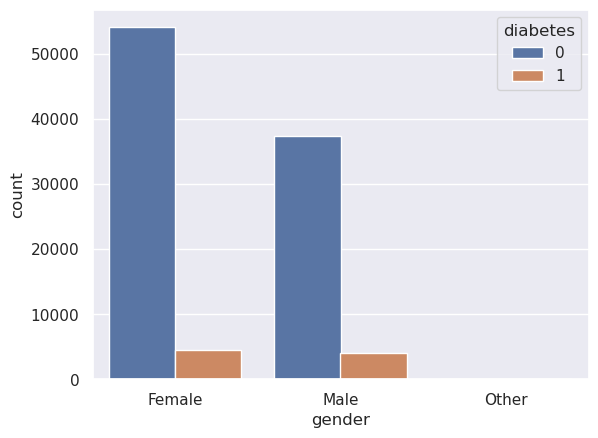

In [67]:
sns.countplot(x='gender', hue='diabetes', data=df_db)

In [68]:
df_db['age'].value_counts()

80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

In [69]:
df_db.groupby('diabetes')['age'].value_counts(normalize=True).reset_index(name='Perc')



,diabetes,age,Perc
0,0,80.0,0.050240
1,0,51.0,0.015902
2,0,48.0,0.015847
3,0,38.0,0.015705
4,0,47.0,0.015650
...,...,...,...
175,1,9.0,0.000471
176,1,11.0,0.000235
177,1,3.0,0.000118
178,1,5.0,0.000118


In [70]:
color_dict=dict({0:'blue',1:'orange'})

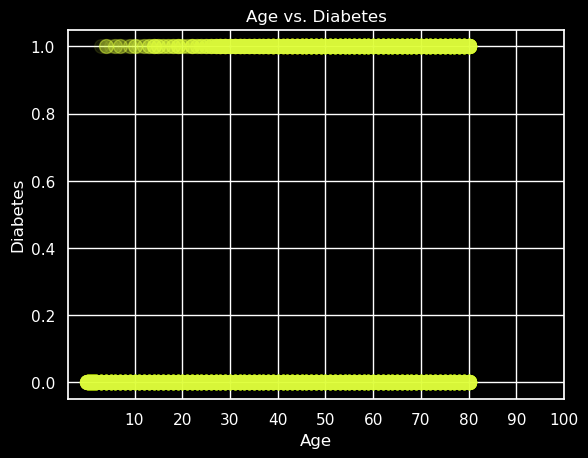

In [83]:
# Build scatter plot
with plt.style.context('dark_background'):
     plt.scatter(df_db['age'],df_db['diabetes'],s=100,c='#E1FF42',alpha=0.1)

plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.title('Age vs. Diabetes')

# Definition of tick_val and tick_lab

tick_val=[10,20,30,40,50,60,70,80,90,100]
tick_lab=['10','20','30','40','50','60','70','80','90','100']
plt.xticks(tick_val,tick_lab)
# Adapt the ticks on the x-axis

plt.xticks(tick_val,tick_lab)

# After customizing, display the plot

plt.show()

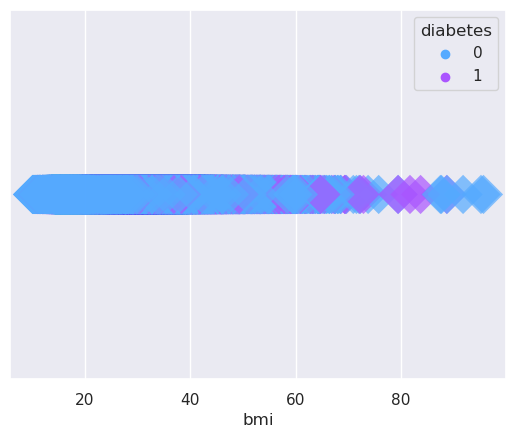

In [72]:
g=sns.stripplot(x='bmi', hue='diabetes', data=df_db, palette='cool', marker='D', s=20, alpha=0.7, jitter=False)


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


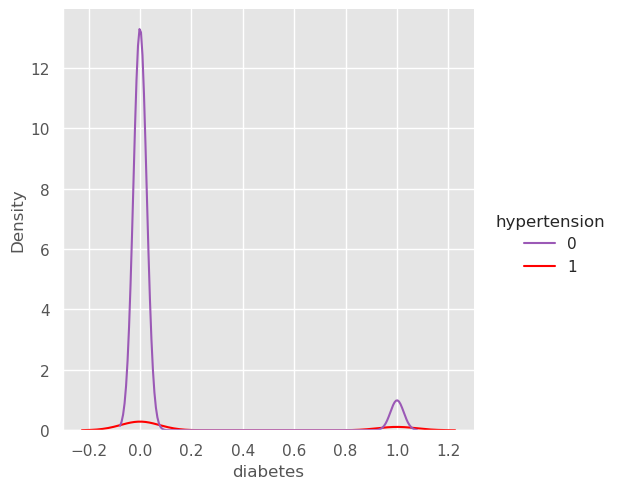

In [78]:
with plt.style.context('ggplot'):
     g1=sns.displot(df_db,x='diabetes',hue='hypertension', palette=['#9b59b6',"#ff0000"],kind='kde')

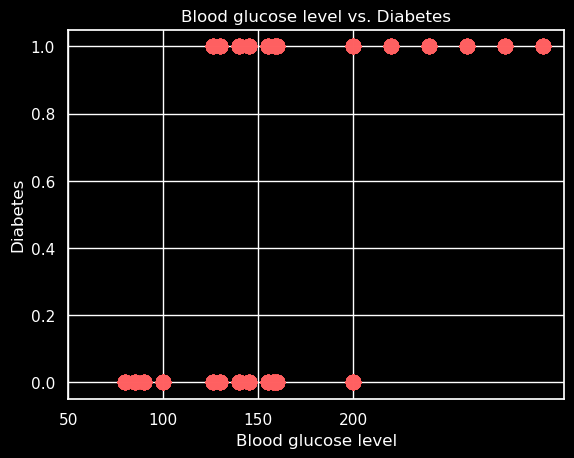

In [85]:
# Build scatter plot
with plt.style.context('dark_background'):
     plt.scatter(df_db['blood_glucose_level'],df_db['diabetes'],s=100,c='#FF6162',alpha=0.7)

plt.xlabel('Blood glucose level')
plt.ylabel('Diabetes')
plt.title('Blood glucose level vs. Diabetes')

# Definition of tick_val and tick_lab

tick_val=[50,100,150,200]
tick_lab=['50','100','150','200']
plt.xticks(tick_val,tick_lab)
# Adapt the ticks on the x-axis

plt.xticks(tick_val,tick_lab)

# After customizing, display the plot

plt.show()

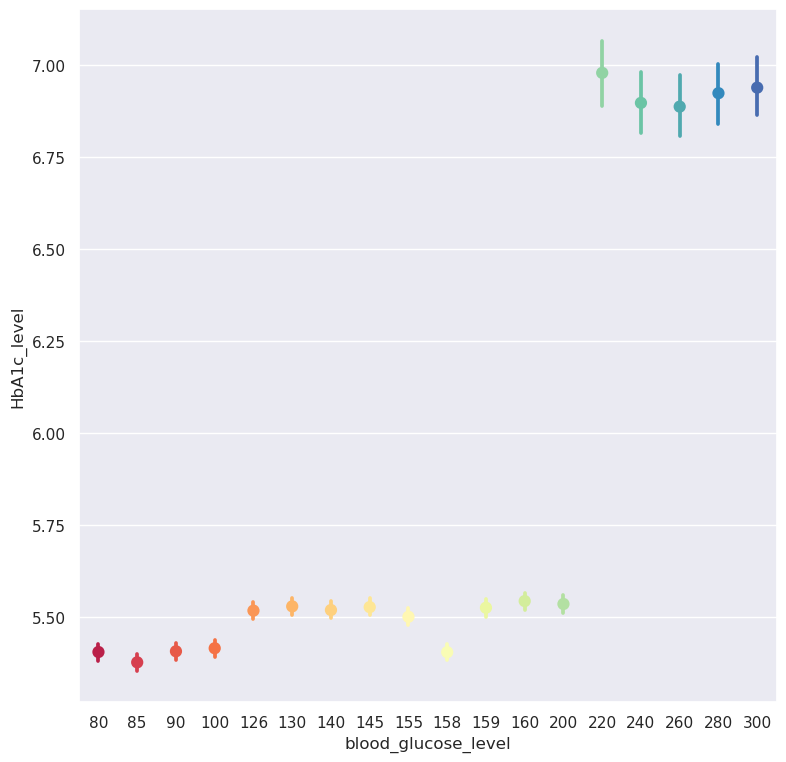

In [100]:
sns.pointplot(data=df_db, x="blood_glucose_level", y="HbA1c_level",palette='Spectral')
sns.set(rc={'figure.figsize':(9,9)})

In [103]:
import plotnine as p9
from plotnine import *
from plotnine.data import *

In [110]:
p1=(p9.ggplot(data=df_db,
           mapping=p9.aes(x='bmi',
                          y='blood_glucose_level',
                          color='age'))
    + p9.geom_point(alpha=0.7)
    + labs(
        x="BMI",
        y="Blood Glucose Level",
        title="Age vs. BMI vs. Glucose levels"
    ))

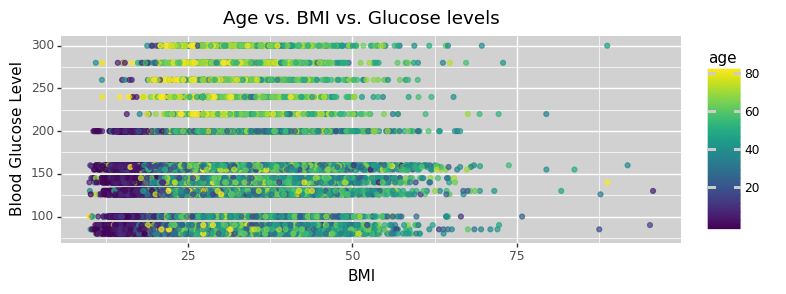

<ggplot: (8463999728773)>

In [111]:
p1 + theme(panel_background=element_rect(fill='k', alpha=.2),figure_size=(8, 6), # inches
    aspect_ratio=1/3)